In [1]:
import sys,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn import metrics

cur_path = os.getcwd()
movie_reviews_data_folder = r"%s\text_analytics\data\movie_reviews\txt_sentoken"  %cur_path

dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))
print(dataset.keys())
print(dataset.target_names)



n_samples: 2000
dict_keys(['target', 'data', 'filenames', 'DESCR', 'target_names'])
['neg', 'pos']


In [4]:
from sklearn.cross_validation import train_test_split
docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

Tokenizing text with scikit-learn

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(docs_train)
print (X_train_counts)
print (X_train_counts.shape)
print(count_vect.vocabulary_.get(u'movie'))  # Find out the movie occurences number

  (0, 9953)	3
  (0, 4522)	3
  (0, 30979)	1
  (0, 14759)	6
  (0, 31570)	1
  (0, 23293)	2
  (0, 34807)	5
  (0, 21298)	7
  (0, 18583)	4
  (0, 2567)	5
  (0, 1570)	15
  (0, 18293)	1
  (0, 24193)	3
  (0, 32636)	1
  (0, 16642)	6
  (0, 16599)	11
  (0, 34927)	1
  (0, 5806)	1
  (0, 25708)	1
  (0, 15109)	1
  (0, 33159)	1
  (0, 34919)	3
  (0, 31479)	16
  (0, 11772)	4
  (0, 9779)	1
  :	:
  (1499, 6763)	1
  (1499, 4716)	1
  (1499, 7357)	1
  (1499, 34911)	1
  (1499, 30310)	1
  (1499, 32853)	1
  (1499, 9478)	1
  (1499, 25678)	1
  (1499, 25758)	1
  (1499, 26221)	1
  (1499, 23668)	1
  (1499, 11007)	1
  (1499, 13393)	1
  (1499, 28796)	1
  (1499, 27738)	1
  (1499, 18188)	1
  (1499, 5924)	1
  (1499, 6060)	1
  (1499, 25217)	1
  (1499, 17870)	1
  (1499, 10257)	1
  (1499, 14170)	1
  (1499, 32808)	1
  (1499, 12571)	1
  (1499, 4430)	1
(1500, 35357)
20612


From occurrences to frequencies

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print(X_train_tf.shape)
print(X_train_tf)

(1500, 35505)
  (0, 16926)	0.095214108814
  (0, 18256)	0.11108312695
  (0, 4600)	0.0158690181357
  (0, 21992)	0.0158690181357
  (0, 31632)	0.650629743563
  (0, 1480)	0.0317380362713
  (0, 832)	0.126952145085
  (0, 20719)	0.095214108814
  (0, 27427)	0.0158690181357
  (0, 34651)	0.0634760725427
  (0, 14407)	0.0317380362713
  (0, 30166)	0.0158690181357
  (0, 28394)	0.0317380362713
  (0, 15789)	0.142821163221
  (0, 197)	0.0158690181357
  (0, 18208)	0.0158690181357
  (0, 34485)	0.0158690181357
  (0, 34938)	0.0634760725427
  (0, 14813)	0.158690181357
  (0, 34768)	0.0158690181357
  (0, 18669)	0.0158690181357
  (0, 21048)	0.0158690181357
  (0, 20718)	0.0158690181357
  (0, 1592)	0.222166253899
  (0, 32998)	0.0158690181357
  :	:
  (1499, 20336)	0.00674660014852
  (1499, 32885)	0.00674660014852
  (1499, 12054)	0.00674660014852
  (1499, 31028)	0.00674660014852
  (1499, 20744)	0.00674660014852
  (1499, 19803)	0.00674660014852
  (1499, 34379)	0.00674660014852
  (1499, 12052)	0.00674660014852
  (1499

In [17]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_tf, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

Merge Above Jobs into Pipeline

In [23]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=False)),
                     ('knn', KNeighborsClassifier(n_neighbors=5)),
           ])

text_clf = text_clf.fit(docs_train,  y_train)

In [24]:
import numpy as np
predicted = text_clf.predict(docs_test)
np.mean(predicted == y_test)       

0.57199999999999995

             precision    recall  f1-score   support

        neg       0.63      0.30      0.40       244
        pos       0.55      0.84      0.67       256

avg / total       0.59      0.57      0.54       500

[[ 72 172]
 [ 42 214]]


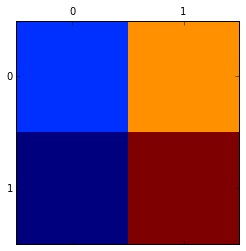

In [26]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,
                                        target_names=dataset.target_names))
# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)
plt.matshow(cm)

In [10]:
import numpy as np
filelist = [[1, 1], [2,1] ]
filelist_matrix = np.matrix(filelist)
result = []
result = np.mean(filelist , axis = 0).tolist()
print(result)

[1.5, 1.0]
